<a href="https://colab.research.google.com/github/Bhavesh122/Amazon_Sentiment_Analysis/blob/main/product_review_sentiment_ditector_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install bs4
!pip install nltk
!pip install wordcloud
!pip install textblob

# runner

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# import module
import requests
from bs4 import BeautifulSoup

HEADERS = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

# user define function
# Scrape the data
def getdata(url):
	r = requests.get(url, headers=HEADERS)
	return r.text


def html_code(url):

	# pass the url
	# into getdata function
	htmldata = getdata(url)
	soup = BeautifulSoup(htmldata, 'html.parser')

	# display html code
	return (soup)


url1 = str(input("please give the url here : "))
url=url1
soup = html_code(url)



please give the url here : https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews


In [ ]:

def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    cus_list = []

    for item in soup.find_all("span", class_="a-profile-name"):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    return cus_list




In [ ]:
def cus_rev(soup):
	# find the Html tag
	# with find()
	# and convert into string
	data_str = ""

	for item in soup.find_all("span", class_="a-size-base review-text review-text-content"):
		data_str = data_str + item.get_text()

	result = data_str.split("\n")
	return (result)




In [ ]:
cus_res=[]
rev_result=[]

In [ ]:
rev_results=[]
cus_ress=[]
nop=int(input('please give the number of review pages you want to analyze'))
for i in range (nop):
  if soup.find_all("li", class_="a-last"):
    url1=url+"&pageNumber="+str(i+1)
    print(url)
    soup = html_code(url1)
    cus_res = cus_data(soup)[2:]
    cus_ress=cus_ress+cus_res
    rev_results=rev_results+rev_result
    print(cus_res)
    rev_data = cus_rev(soup)
    rev_result = []
    for i in rev_data:
      if i is "":
        pass
      else:
        rev_result.append(i)
    print(rev_result)
  else:
    pass





<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?


please give the number of review pages you want to analyze5


<ipython-input-63-c9ee52e98bf2>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is "":


https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
['Mahesh', 'Mahesh', 'Biswajit', 'Bappa', 'Neko', 'Neko', 'Good Boy', 'Aakash', 'd mohan rao', 'Narayan', 'Narayan', 'Sujan Baruah', 'Dhirendar kumar']
["Part 1 Review: Have been using Redmi Note 5 Pro since many years and have been a fan of Mi phones since them. The phone is now full and the only reason to switch to Redmi Note 10 pro max is because of Dual Sim+Dedicated Memory slot. Once again very impressed by Redmi Design. The phone is amazing. Slim and can be held in one hand comfortably. Notch doesn't create any disturbance for OCD people like me. Finger print sensor and face unlock is super fast. Silicone case provided with package is pretty good and phone looks amazing with supplied case, without hiding the color and premium look of the phone. Don't buy any other case. The available cases in market are not good and hides away th

In [ ]:
x=list(set(cus_ress))
y=list(set(rev_results))

In [ ]:
if len(y)>len(x):
  dif=len(y)-len(x)
  y=y[dif:]
  print('process complete....')
elif len(x)>len(y):
  dif=len(x)-len(y)
  x=x[dif:]
  print('process complete...')
else:
  print('Done')

Done


In [ ]:
len(x),len(y)

(10, 10)

In [ ]:
import pandas as pd

# initialise data of lists.
data = {'Name': x,
        'review': y}

# Create DataFrame
data= pd.DataFrame(data)

# Save the output.
data

,Name,review
0,Mahesh,Ok
1,d mohan rao,"Oh my god, I am in love with this phone. It's ..."
2,Good Boy,A wonderful phone but some drawbacks too.I am ...
3,Narayan,Written after 3 months of daily use! Def recom...
4,Sujan Baruah,Part 1 Review: Have been using Redmi Note 5 Pr...
5,Bappa,Its only been a few days since I received the ...
6,Dhirendar kumar,Camera not working
7,Aakash,I'm Writing This After using of 6 month.1. Fir...
8,Biswajit,"Nice phone, But camera is not so good. 108 MP ..."
9,Neko,l own a Redmi Note 3 & also a Mi Pad. The expe...


In [ ]:

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)['neu'] for i in data["review"]]


In [ ]:
from textblob import TextBlob
data["polarity"]=[TextBlob(i).sentiment[0] for i in data["review"]]
data["subjectivity"]=[TextBlob(i).sentiment[0] for i in data["review"]]

In [ ]:
data

,Name,review,Positive,Negative,Neutral,polarity,subjectivity
0,Mahesh,Ok,1.000,0.000,0.000,0.500000,0.500000
1,d mohan rao,"Oh my god, I am in love with this phone. It's ...",0.190,0.065,0.745,0.218476,0.218476
2,Good Boy,A wonderful phone but some drawbacks too.I am ...,0.099,0.027,0.874,0.186225,0.186225
3,Narayan,Written after 3 months of daily use! Def recom...,0.159,0.049,0.792,0.091001,0.091001
4,Sujan Baruah,Part 1 Review: Have been using Redmi Note 5 Pr...,0.155,0.071,0.774,0.139653,0.139653
5,Bappa,Its only been a few days since I received the ...,0.131,0.049,0.820,0.253197,0.253197
6,Dhirendar kumar,Camera not working,0.000,0.000,1.000,0.000000,0.000000
7,Aakash,I'm Writing This After using of 6 month.1. Fir...,0.125,0.014,0.861,0.300088,0.300088
8,Biswajit,"Nice phone, But camera is not so good. 108 MP ...",0.222,0.055,0.723,0.349914,0.349914
9,Neko,l own a Redmi Note 3 & also a Mi Pad. The expe...,0.074,0.076,0.850,-0.022735,-0.022735


In [ ]:
M = sum(data["Positive"])
N = sum(data["Negative"])


def sentiment_score(a, b):
    if (a>b):
        print("Positive 😊 ")
    else:
        print("Negative 😠 ")
sentiment_score(M, N)

Positive 😊 


In [ ]:
print("Positive: ", M)
print("Negative: ", N)

Positive:  2.155
Negative:  0.406


Enter Amazon product review URL: https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
Positive Percentage: 80.0
Negative Percentage: 10.0


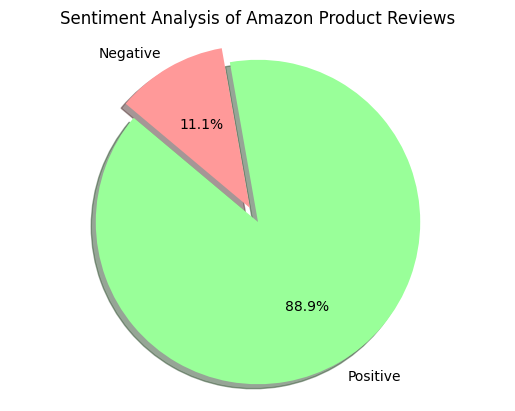

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_reviews_sentiment(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('span', {'data-hook': 'review-body'})

    positive_count = 0
    negative_count = 0

    for review in reviews:
        text = review.get_text()
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            positive_count += 1
        elif analysis.sentiment.polarity < 0:
            negative_count += 1

    total_reviews = len(reviews)
    positive_percentage = (positive_count / total_reviews) * 100
    negative_percentage = (negative_count / total_reviews) * 100

    return positive_percentage, negative_percentage

def plot_sentiment_graph(positive_percentage, negative_percentage):
    labels = ['Positive', 'Negative']
    sizes = [positive_percentage, negative_percentage]
    colors = ['#99ff99', '#ff9999']
    explode = (0.1, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Sentiment Analysis of Amazon Product Reviews')
    plt.show()

if __name__ == "__main__":
    url = input("Enter Amazon product review URL: ")
    positive_percentage, negative_percentage = get_reviews_sentiment(url)
    print("Positive Percentage:", positive_percentage)
    print("Negative Percentage:", negative_percentage)
    plot_sentiment_graph(positive_percentage, negative_percentage)


There are 29460 words in all the messages.


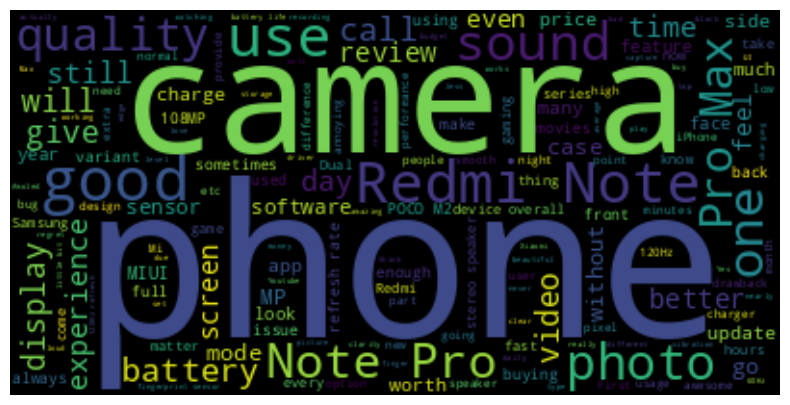

In [ ]:
text = " ".join(review for review in data.review)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
feature=str(input('Look here for the feature you want the review about : ')).lower()
a=data[data['review'].str.contains(feature)]
a

Look here for the feature you want the review about : display


,Name,review,Positive,Negative,Neutral,polarity,subjectivity
2,Good Boy,A wonderful phone but some drawbacks too.I am ...,0.099,0.027,0.874,0.186225,0.186225
5,Bappa,Its only been a few days since I received the ...,0.131,0.049,0.820,0.253197,0.253197
8,Biswajit,"Nice phone, But camera is not so good. 108 MP ...",0.222,0.055,0.723,0.349914,0.349914
9,Neko,l own a Redmi Note 3 & also a Mi Pad. The expe...,0.074,0.076,0.850,-0.022735,-0.022735


In [ ]:
usrinp=int(input('Do you want to see a perticular review just type the index number here : '))
a.review[usrinp]

Do you want to see a perticular review just type the index number here : 8


"Nice phone, But camera is not so good. 108 MP is capturing more details but the overall photos are more saturated so it looks like reddish. If MI fix this by update then awesome phone in this price segment.Also a little bit heat is produced at the side of rear camera. And manytimes the UI lags. So that you can't feel the actual power of 120Hz refresh rate.Multimedia experience is awesome. Sound clarity is awesome. Network speed is so fast. At a time you can use hotspot and wifi. That's nice feature.One thing is noticed that, if you play the video in 360p or 480p then the clarity is not so good like other small resolution phones. This phone comes with a display resolution of 2060px1080p. So you have to play the videos in 1080p to get full HD experience, otherwise in 360p,480p or 720p mode the video experience is a little bit blurry type.That's much, nothing found any problems.Overally phone is very good. The look of this phone is top notch. Personally I loved it. But the price is littl